**Week 1: Coding Assignment: Perceptron**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic
from pylab import rand
from sklearn import datasets

In [0]:
class Perceptron():
    def __init__(self, lr):
        self.lr = lr
    
    def predict(self, x, classifier = logistic.cdf):
        """
        Classify data using current instance of weights and classifier.
        """
        z = sum(x * self.w)
        activation = classifier(z)
        return 1 if activation >= 0.5 else 0
    
    def updateWeights(self, x, y, d):
        """
        Updates the weights based on error from one training data point.
        """
        err = d - y
        self.w += self.lr * err * x
    
    def evaluateModel(self, inputs, labels):
        """
        Returns the total error for current instance of model.
        """
        model_error = 0
        errors = list(map(lambda x, d: abs(d - self.predict(x)), 
                          inputs, labels))
        model_error = sum(errors)
        return model_error
    
    def descisionBoundary(self):
        """Returns the slope and intercept of the decision boundary."""
        slope = -self.w[1] / self.w[2]
        intercept = -self.w[0] / self.w[2]
        return slope, intercept
    
    def predictedLabels(self, inputs):
        """
        Uses model to predict labels for inputs. Returns array of labels.
        """
        ndata_points = np.len(inputs)
        predicted_labels = np.zeros(ndata_points)
        for i, x in enumerate(inputs):
            predicted_labels[i] = self.predict(x)
        return predicted_labels
    
    def train(self, data, labels, n_epochs=20):
        """
        Train perceptron using data and corresponding labels.
        Stop when error = 0 or when n_epochs is reached.
        """
        n_data_points, n_inputs = np.shape(data)
        
        # set number of neurons and initialize weights
        self.n = n_inputs + 1
        self.w = rand(self.n)
        
        # add biases to data
        biases = np.ones(n_data_points)
        inputs = np.concatenate((np.transpose([biases]), data), axis=1)
        
        # run learning algorithm u
        print('Initial model error = %d' % (self.evaluateModel(inputs, labels)))
        for epoch in range(n_epochs):
            model_error = self.evaluateModel(inputs, labels)
            for x, d in zip(inputs, labels):
                y = self.predict(x)
                self.updateWeights(x, y, d)
            model_error = self.evaluateModel(inputs, labels)
            print('epoch=%d, error=%d' % (epoch, model_error))
            if model_error == 0:
                break
        return model_error

In [0]:
def generateData(n):
    data, labels = datasets.make_blobs(n_samples=100, centers=2, n_features=2, 
                                       center_box=(0, 10))
    return data, labels

In [0]:
def plotResults(data, labels, slope, intercept):
    plt.clf()
    plt.plot(data[:, 0][labels == 0], data[:, 1][labels == 0], 'go')
    plt.plot(data[:, 0][labels == 1], data[:, 1][labels == 1], 'bo')
    
    x1 = min(data[:,0])
    x2 = max(data[:,0])
    y1 = x1 * slope + intercept
    y2 = x2 * slope + intercept
    plt.plot([x1, x2], [y1, y2], 'r-')
    
    plt.grid(True)
    plt.show()

In [0]:
def main():
    # number of points in dataset
    n_data_points = 100
    # learning rate for perceptron
    lr = 0.1
    # maximum number of epochs to train
    n_epochs = 50
    
    # generate data and train
    data, labels = generateData(n_data_points)
    P = Perceptron(lr)
    P.train(data, labels, n_epochs)
    
    # plot decision boundary
    slope, intercept = P.descisionBoundary()
    plotResults(data, labels, slope, intercept)

Initial model error = 50
epoch=0, error=6
epoch=1, error=6
epoch=2, error=3
epoch=3, error=2
epoch=4, error=2
epoch=5, error=2
epoch=6, error=4
epoch=7, error=2
epoch=8, error=4
epoch=9, error=5
epoch=10, error=4
epoch=11, error=5
epoch=12, error=3
epoch=13, error=3
epoch=14, error=3
epoch=15, error=3
epoch=16, error=1
epoch=17, error=3
epoch=18, error=1
epoch=19, error=3
epoch=20, error=1
epoch=21, error=3
epoch=22, error=1
epoch=23, error=2
epoch=24, error=1
epoch=25, error=2
epoch=26, error=1
epoch=27, error=2
epoch=28, error=1
epoch=29, error=2
epoch=30, error=1
epoch=31, error=2
epoch=32, error=1
epoch=33, error=1
epoch=34, error=1
epoch=35, error=1
epoch=36, error=1
epoch=37, error=1
epoch=38, error=1
epoch=39, error=1
epoch=40, error=0


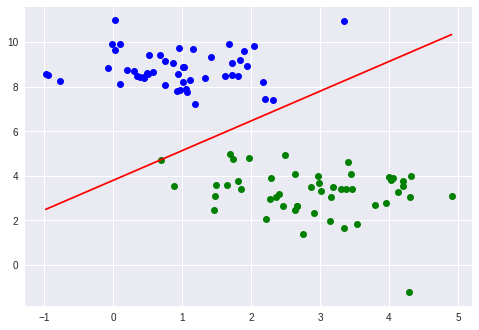

In [146]:
main()